# Semester 2 Strategic Thinking CA

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
np.set_printoptions(precision=4)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import missingno as msno
from scipy.stats import f_oneway
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

### Import Dataset 

In [2]:
df = pd.read_csv("Dataset of Diabetes .csv")

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [4]:
df.shape

(1000, 14)

In [5]:
# Print the column names
print(df.columns)

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


In [6]:
df.isnull().values.any()

False

In [7]:
total_missing = df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing)

Total missing values in the DataFrame: 0


In [8]:
if df['ID'].duplicated().any():
    print("There are duplicates in column ID.")

There are duplicates in column ID.


In [9]:
if df.duplicated().any():
    print("There are duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


### Initial data exploration led to us dropping two values - ID and No_Pation as unique values, not useful for ML


In [10]:
to_drop = ['ID',
           'No_Pation']

df.drop(to_drop, inplace=True, axis=1)

In [11]:
# Print the column names
print(df.columns)

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')


### Visualise the Dataset 

In [12]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


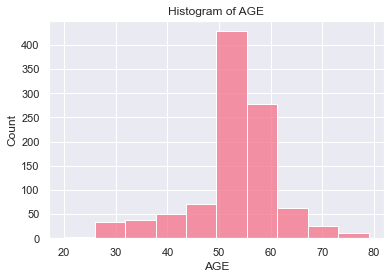

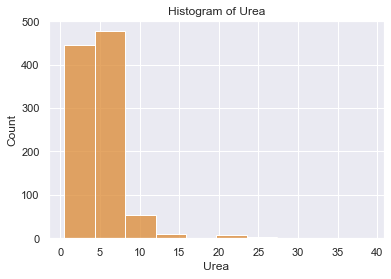

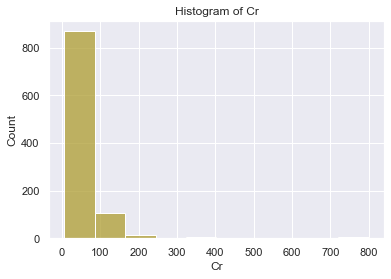

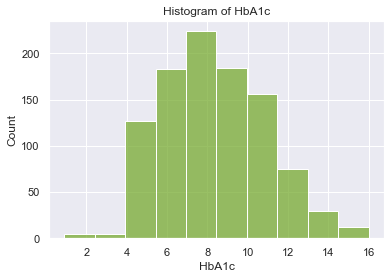

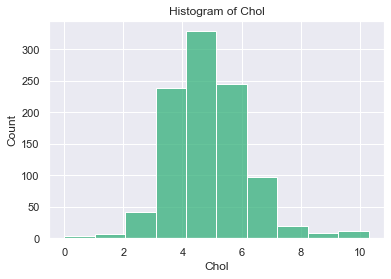

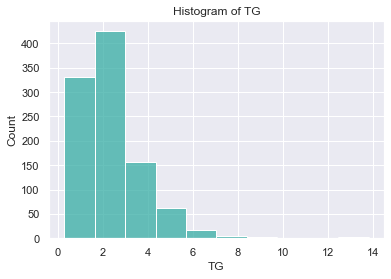

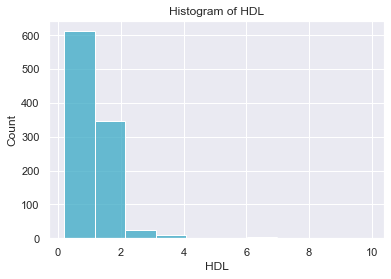

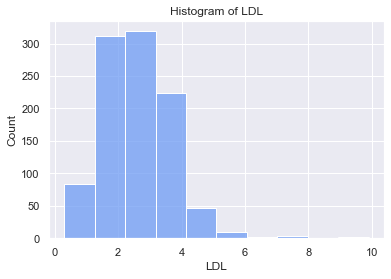

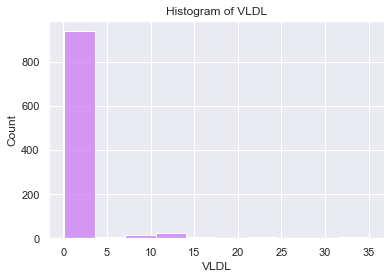

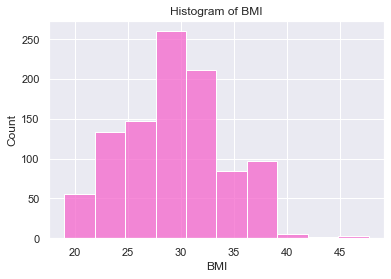

In [13]:
selected_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Set the color palette
sns.set_palette("husl")  # You can choose from various color palettes

# Create a unique color for each histogram
colors = sns.color_palette("husl", len(selected_columns))

# Create separate histograms for each selected column with a different color
for i, column in enumerate(selected_columns):
    plt.figure(figsize=(6, 4))  # Set the size of each individual plot
    sns.histplot(df[column], bins=10, color=colors[i])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

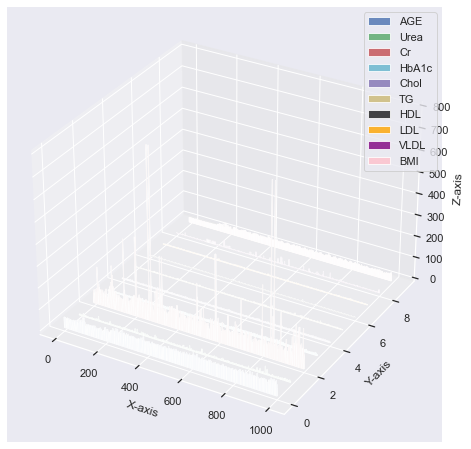

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have a DataFrame 'df'
selected_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Create a 3D figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define different colors for each bar
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

# Create a 3D bar chart for each selected column with a different color
for i, column in enumerate(selected_columns):
    x = range(len(df))
    y = df[column]
    z = [i] * len(df)
    ax.bar(x, y, z, zdir='y', color=colors[i], alpha=0.8, label=column)

# Set axis labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# Show the 3D bar chart
plt.show()

In [ ]:
# THere is one lower case 'f' in the data which should be uppercase
# Update the gender column
df['Gender'] = df['Gender'].replace('f', 'F')

In [ ]:
# Domain knowledge tells us that "pre-diabetes is not considered to be a relevant status in Ireland.
# C0nvert class P to N
df['CLASS'] = df['CLASS'].replace('P', 'N')

In [ ]:
for column in categorical_columns:
    # Count the occurrences of each category in the column
    category_counts = df[column].value_counts()
    
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Why are there two "Y" and two "N" entries?
df[column] = df[column].str.strip()

In [ ]:
for column in categorical_columns:
    # Count the occurrences of each category in the column
    category_counts = df[column].value_counts()
    
    plt.bar(category_counts.index, category_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Scatter plot for numbers
from pandas.plotting import scatter_matrix

numerical_values =['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']


# Plot scatter matrix for specified columns
scatter_matrix(df[numerical_values], figsize=(20, 20))



# Defining the problem statement:

Can we create a predictive model which can tell if a person will develop diabetes based on potential risk factors such as obesity, high cholesterol and high triglycerides

Target Variable: CLASS

Predictors: age, gender, BMI, Chol, TG etc.

CLASS = N No diabetes
CLASS = Y Diabetes

Need to look at distribution of target variable


In [ ]:
# Creating Bar chart as the Target variable is Categorical
GroupedData = df.groupby('CLASS').size()
GroupedData.plot(kind='bar', figsize=(4,3), title='Diabetic Vs Not Diabetic');

## The Data is skewed
The features need to be scaled so that they have similar ranges. There are not enough rows for the ML algorithms to learn. Before we apply ML we will have to normalise or standardise the data This can be done using techniques such as Min-Max scaling or Standard scaling. Min-Max scaling scales the data to a fixed range, typically between 0 and 1, while Standard scaling scales the data to have a mean of 0 and a standard deviation of 1.This did not work in Semester 1.
Need to make all values numbers first.

Issues found with Semester 1 work

Data Splitting vs. Encoding Order:
We split the data into training and testing sets but then used one-hot encode on the whole df. This order was incorrect.
Treatment of the Gender column:
We used onehot encoder to code the gender column but later in the code we also used pd.getdummies to do the same thing again. 
StandardScaler
We ran scaler = StandardScaler() twice but only used it once.

This is what we should have done
    Split Data First, then encode the Training Data using either OneHotEncoder or pd.get_dummies(); then use the Same Encoder for the Test Data, then finally scale the Continuous Columns.

Also we encoded CLASS but that is out predictor and I don't think we should have. So I will drop that.

In [ ]:
# Split into test and train data (80:20)
df_train, df_test = train_test_split(df,test_size=0.2)

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2)
print("Train missing values:", df_train.isnull().sum())
print("Test missing values:", df_test.isnull().sum())

In [ ]:
# Encode TRAINING & TEST data seperately
ohe = OneHotEncoder(sparse_output=False)
df_train_encoded = ohe.fit_transform(df_train[['Gender']])
df_test_encoded = ohe.transform(df_test[['Gender']])

In [ ]:
# After encoding:
df_train_encoded = pd.DataFrame(df_train_encoded, columns=ohe.get_feature_names_out(['Gender']))
df_test_encoded = pd.DataFrame(df_test_encoded, columns=ohe.get_feature_names_out(['Gender']))

# Check for missing values in the DataFrames
print("Train encoded missing values:", df_train_encoded.isnull().sum())
print("Test encoded missing values:", df_test_encoded.isnull().sum())

In [ ]:
# Convert 'Gender' and 'CLASS' columns to numeric binary values
df = pd.get_dummies(df, columns=['Gender', 'CLASS'])

In [ ]:
df.head()

In [ ]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Concatenate with the original train/test DataFrames (drop original 'Gender' and columns)
#df_train = pd.concat([df_train.drop(['Gender'], axis=1), df_train_encoded], axis=1)
#df_test = pd.concat([df_test.drop(['Gender'], axis=1), df_test_encoded], axis=1)


In [ ]:
print("Train combined missing values:", df_train.isnull().sum())
print("Test combined missing values:", df_test.isnull().sum())

In [ ]:
# Now, scale continuous columns 
scaler = StandardScaler()
continuous_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
df_train[continuous_cols] = scaler.fit_transform(df_train[continuous_cols])
df_test[continuous_cols] = scaler.transform(df_test[continuous_cols])

In [ ]:
print("Train scaled missing values:", df_train.isnull().sum())
print("Test scaled missing values:", df_test.isnull().sum())

 We did not use eithr PCA or LDA in Semester 1. It is a small dataset so it probably does not need this but let's try.
 
We need to fit the LDA model only on the training data so no test data is used and then transform both after it's been fitted. 

In [ ]:
# Prepare the features (X) and target (y) for both training and testing sets
X_train = df_train.drop('CLASS_Y', 'CLASS_N', axis=1)
y_train = df_train['CLASS_Y', 'CLASS_N']
X_test = df_test.drop('CLASS_Y', 'CLASS_N', axis=1)
y_test = df_test['CLASS_Y', 'CLASS_N']

# Initialize LDA
lda = LinearDiscriminantAnalysis(n_components=1) 

# Fit on training data and transform
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform test data
X_test_lda = lda.transform(X_test)

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

In [ ]:
df.head() 

In [ ]:
df.columns

In [ ]:
#### description of columns
df.Urea.describe()

In [ ]:
df.AGE.describe()

In [ ]:
df.Cr.describe()

In [ ]:
df.HbA1c.describe()

In [ ]:
df.Chol.describe()

In [ ]:
df.TG.describe()

In [ ]:
df.HDL.describe()

In [ ]:
df.VLDL.describe()

In [ ]:
df.BMI.describe()

### Logistic Regression

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
# Split the data into features and target
X = df.drop('CLASS', axis=1)  # Features
y = df['CLASS']  # Target

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scaling the features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

### Decision Tree MLM

In [ ]:
# Split the dataset into input features and output labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with default hyperparameters
dtc = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
dtc.fit(X_train, y_train)

# Predict the output values on the test data
y_pred = dtc.predict(X_test)

# Evaluate the performance of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### Random forest MLM

In [ ]:
# Split the dataset into input features and output labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rfc.fit(X_train, y_train)

# Predict the output values on the test data
y_pred = dtc.predict(X_test)

# Evaluate the performance of the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### Evaluation

In [ ]:
Confusion Matrix